In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Mean Imputation

In [7]:
text_column = df.select_dtypes(['object', 'category']).columns

In [8]:
na_columns = df.columns[df.isna().any()]

In [9]:
for i in na_columns:
    if i not in text_column:
        df[i].fillna(np.mean(df[i]), inplace = True)

just filling out all of the numerical columns with mean of the column. 
Other method to make it faster is imputation.

# Imputation

In [10]:
df = pd.read_csv('train.csv')

In [11]:
from sklearn.impute import SimpleImputer
a = SimpleImputer(strategy='mean')
num_columns = df[na_columns].select_dtypes(['int64', 'float64']).columns

In [12]:
df[num_columns] = a.fit_transform(df[num_columns])

In [13]:
df.columns[df.isna().any()]

Index(['Cabin', 'Embarked'], dtype='object')

# Removing Features with a lot of missing values

In [14]:
for i in df:
    print(i, df[i].isnull().sum()/df.shape[0])

PassengerId 0.0
Survived 0.0
Pclass 0.0
Name 0.0
Sex 0.0
Age 0.0
SibSp 0.0
Parch 0.0
Ticket 0.0
Fare 0.0
Cabin 0.7710437710437711
Embarked 0.002244668911335578


cabin has 77% of missing values, so we will just drop this column it is not going to help us anyway

In [15]:
df = df.drop('Cabin', axis=1)

In [16]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

# Imputation of text columns

In [17]:
to_impute = df['Embarked'].mode()[0]

In [18]:
df['Embarked'] = df['Embarked'].replace(np.NAN, to_impute)

In [19]:
df.columns[df.isna().any()]

Index([], dtype='object')

now, there are no na values in the whole dataset

# Removing features with no helpful data

In [20]:
df = df.drop(['Name', 'Ticket'], axis=1)

In [21]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,29.699118,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


# labelEncoding of text columns

In [22]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

In [23]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for i in df.select_dtypes(['object']).columns:
    df[i] = labelencoder.fit_transform(df[i])

In [24]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.000000,1,0,7.2500,2
1,2,1,1,0,38.000000,1,0,71.2833,0
2,3,1,3,0,26.000000,0,0,7.9250,2
3,4,1,1,0,35.000000,1,0,53.1000,2
4,5,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000,2
887,888,1,1,0,19.000000,0,0,30.0000,2
888,889,0,3,0,29.699118,1,2,23.4500,2
889,890,1,1,1,26.000000,0,0,30.0000,0


# One hot encoding
This one is better as your model will not confuse the labels assigned to the different unique values in label encoding.

# Feature Engineering - Merging Features

In [25]:
df['Family'] = df['SibSp'] + df['Parch'] + 1

In [26]:
df = df.drop(['SibSp', 'Parch'], axis=1)

# Correcting Datatypes

In [27]:
df['Age'] = df['Age'].astype('int64')

# Dealing with outliers

In [28]:
feature_list = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Family']

In [29]:
train_X = df[feature_list]

In [30]:
train_Y = df['Survived']

the outliers can possibly be in age and fare. Lets detect them.

<AxesSubplot:xlabel='Fare'>

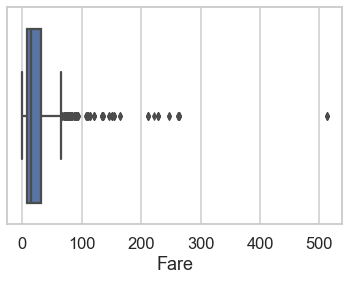

In [80]:
import seaborn as sns
sns.set_context("talk")
sns.set_style("whitegrid")

sns.boxplot(x=train_X.Fare)

we can remove all those points above 200 because they seem to be a bit harsh outliers.

<AxesSubplot:xlabel='Age'>

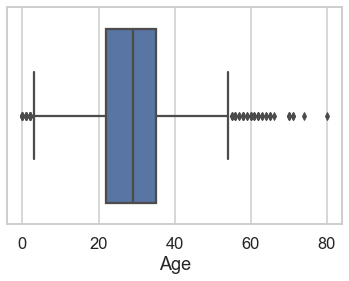

In [78]:
sns.boxplot(x=train_X.Age)

we can remove all those points above 69 because they seem to be a bit harsh outliers.

the black dots are the outliers i.e. are 1.5*IQR away from either upper quartile or lower quartile.

### IQR Score

In [33]:
q1 = train_X[['Fare']].quantile(0.25)[0]
q3 = train_X[['Fare']].quantile(0.75)[0]
q3-q1

23.0896

In [34]:
filtered_train_X = train_X[(train_X.Fare > q1-1.5*(q3-q1)) & (train_X.Fare < q3+1.5*(q3-q1))]

In [35]:
filtered_train_X.shape

(775, 6)

In [36]:
train_X.shape

(891, 6)

Now we have got 775 points that are not outliers.

### Threshold

In [56]:
filtered2_train_X = train_X[(train_X.Fare < 200)]

In [57]:
filtered2_train_X.shape

(871, 6)

In [58]:
filtered2_train_X = filtered2_train_X[(filtered2_train_X.Age < 69)]

In [59]:
filtered2_train_X.shape

(864, 6)

These 864 rows are actually the dataset without some harsh outliers of age and fare.

### Z-Score or STD

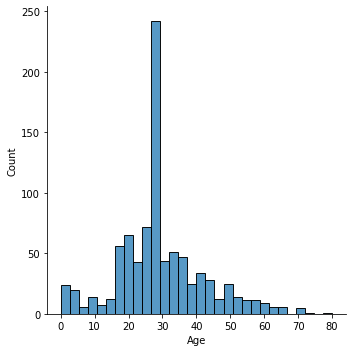

In [61]:
sns.displot(x=train_X.Age)

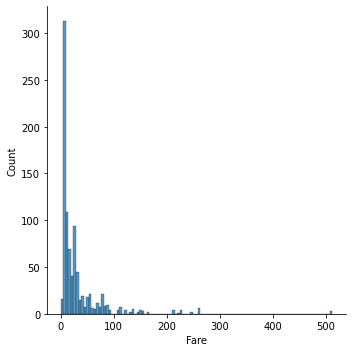

In [62]:
sns.displot(x=train_X.Fare)

z-score is actually the number of standard deviation is far away from the mean. So, instead of calculating z-score if we can just calculate the std and mean and filter those values with a specific threshold value of std, then we can have our outliers.

Taking a  threshold of 3 times the std of fare and age.

In [63]:
mean = train_X['Fare'].mean()
std = train_X['Fare'].std()
std

49.6934285971809

In [64]:
filtered_train_X = train_X[(train_X.Fare > mean-3*(std)) & (train_X.Fare < mean+3*(std))]
filtered_train_X.shape

(871, 6)

Hence, these 871 points are the ones which are not outliers.

In [65]:
mean = train_X['Age'].mean()
std = train_X['Age'].std()
std

13.013778302447072

In [66]:
filtered_train_X = filtered_train_X[(filtered_train_X.Age > mean-3*(std)) & (filtered_train_X.Age < mean+3*(std))]
filtered_train_X.shape

(864, 6)

So, I removed the outliers of both age and fair, hence got 864 well suited data points. 

This is proof that we took good threshold values in the above section because our answer is the same. 
Moreover, we can conclude if you cant decide the threshold values just come to the STD way of doing it.

# Feature_importance

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt = DecisionTreeClassifier()
dt.fit(train_X,train_Y)
fitted_Y = dt.predict(train_X)
accuracy_score(train_Y,fitted_Y)*100

97.64309764309765

In [48]:
dt.feature_importances_.sum()

1.0000000000000002

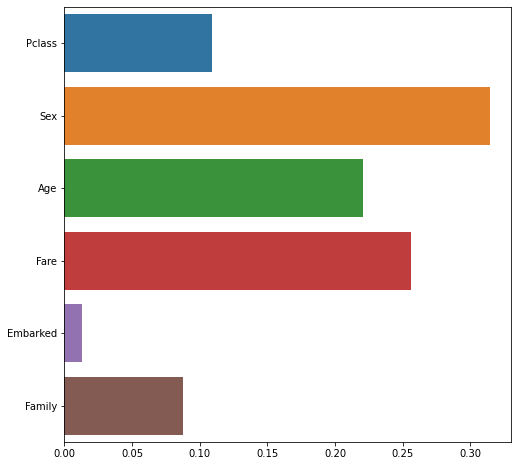

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,8))
sns.barplot(x=dt.feature_importances_ ,y=feature_list)
plt.show()